# <p style="text-align: center;">Predição do preço do diamante: Regressão</p>

## Contexo

Este DataSet contém os preços e outros atributos de quase 54000 diamantes.

**price**: Preço em US dollars ($326 -- $18,823)

**carat**: Quilate, peso do diamante (0.2 -- 5.01)

**cut**: Qualidade do corte (Fair, Good, Very Good, Premium, Ideal)

**color**: Cor do diamante, from J (worst/pior) to D (best/melhor)

**clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x**: comprimento en mm (0 -- 10.74)

**y**: largura em mm (0 -- 58.9)

**z**: altura em mm (0 -- 31.8)

**depth**: porcentagem total de altura = z / mean(x, y) = 2 * z / (x + y) (43 -- 79)

**table**: largura do topo do diamante em relação ao ponto mais largo (43 -- 95)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('diamonds.csv')
df.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
44063,44064,0.55,Ideal,E,SI1,62.3,56.0,1551,5.23,5.26,3.27
6310,6311,0.56,Very Good,D,IF,62.5,59.0,4025,5.26,5.30,3.30
7559,7560,1.12,Premium,H,SI2,62.4,58.0,4250,6.63,6.58,4.12
45457,45458,0.70,Good,I,SI2,63.5,56.0,1675,5.59,5.63,3.56
6365,6366,0.32,Premium,H,SI1,61.9,59.0,576,4.41,4.38,2.72
12844,12845,1.25,Ideal,G,SI2,61.6,57.0,5355,6.98,6.91,4.28
41509,41510,0.54,Very Good,H,SI1,61.6,56.0,1235,5.21,5.24,3.22
28355,28356,0.34,Ideal,H,VVS2,61.2,56.0,667,4.51,4.54,2.77
22069,22070,1.70,Premium,G,SI2,58.9,62.0,10091,7.79,7.72,4.57
2472,2473,0.76,Ideal,E,VS2,61.5,56.0,3192,5.92,5.89,3.63


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### A primeira coluna 'Unnamed' é apenas para numerar as amostras, não servindo para a análise. Portanto será removida do DataFrame.

In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Os eixos x, y e z apresentam valores mínimos de 0. Para um diamante existir, não é possível que exista um eixo com valor igual à 0, portanto é necessário remover estes valores.

In [6]:
df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)
df = df.drop(df[df['z'] == 0].index)
df.shape

(53920, 10)

In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

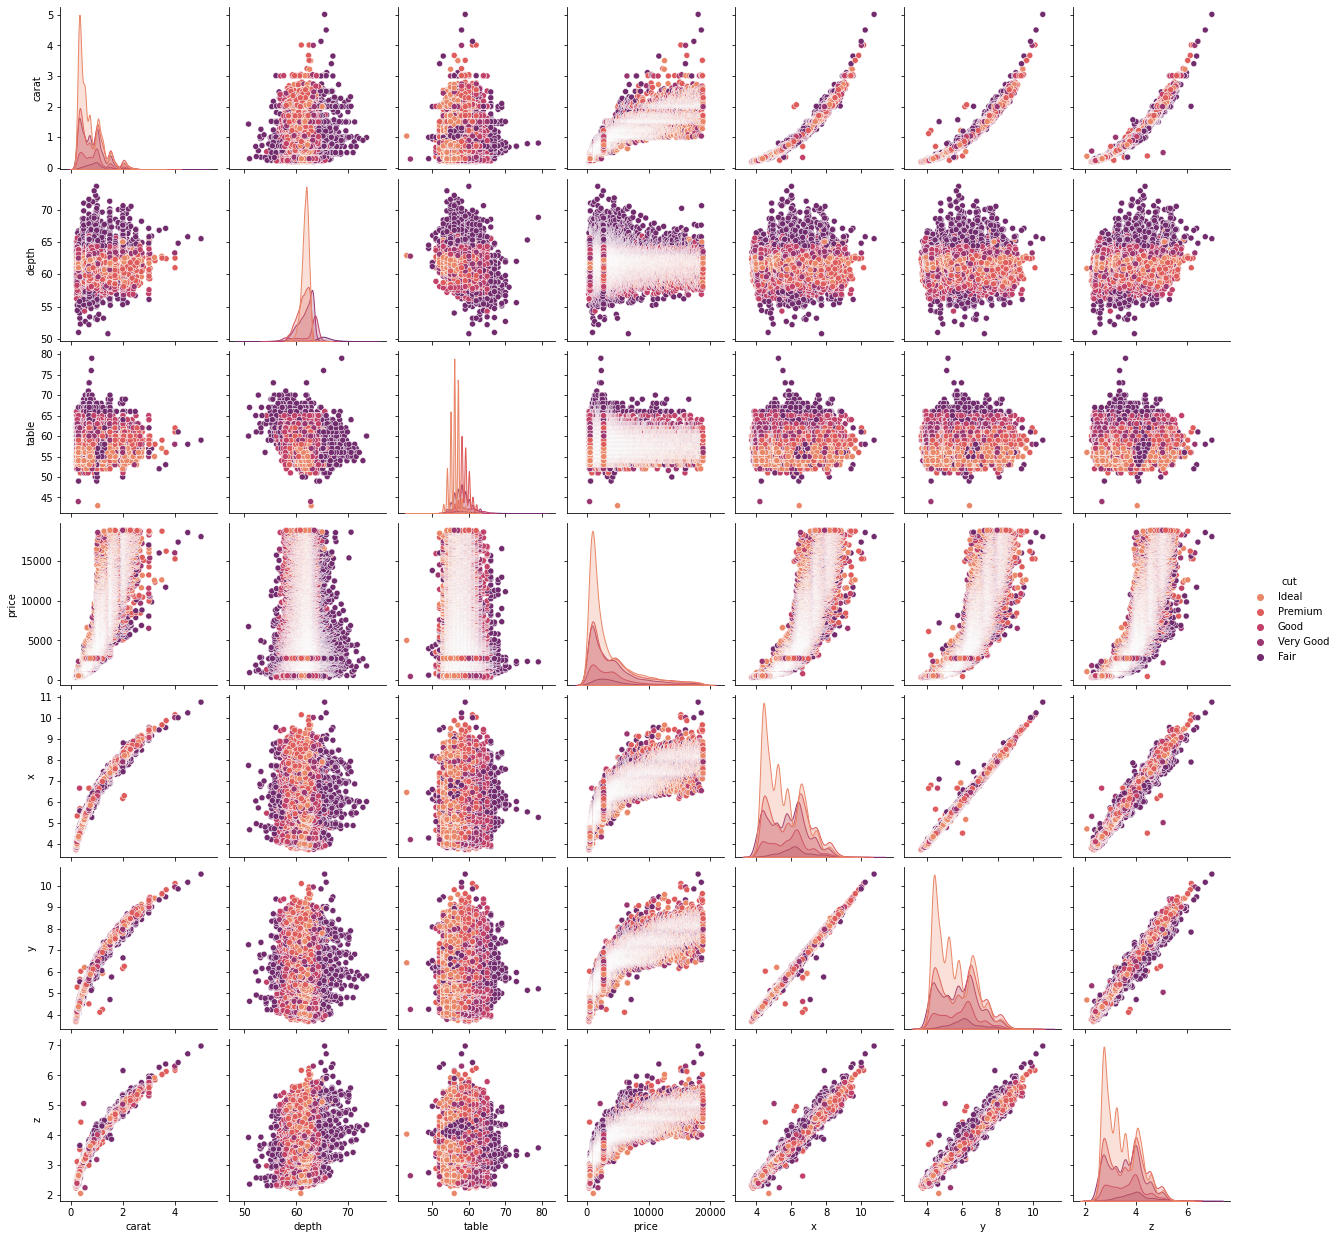

In [26]:
sns.pairplot(df, hue = 'cut', palette = 'flare')

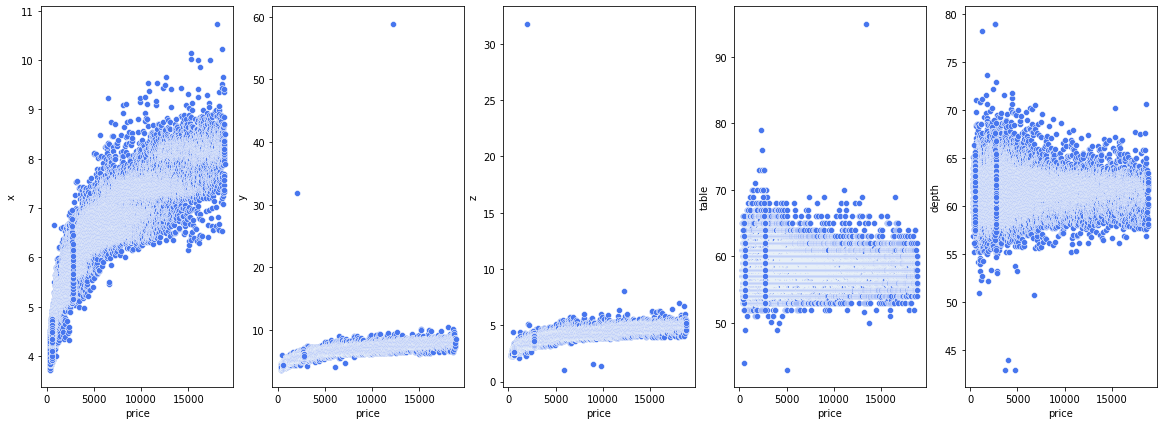

In [9]:
sns.set_palette('turbo')
cols = ['x', 'y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = df, x = df['price'], y = df[i], ax = axs[c])
    c += 1

## Através dos gráficos acima é possível observar outliers presentes nos 5 gráficos e estipular os valores que podem ser removidos para que os dados fiquem mais concisos.

In [10]:
df = df[(df['x'] < 11)]
df = df[(df['y'] < 20)]
df = df[(df['z'] < 10) & (df['z'] > 2)]
df = df[(df['table'] < 80) & (df['table'] > 40)]
df = df[(df['depth'] < 75) & (df['depth'] > 50)]

df.shape

(53907, 10)

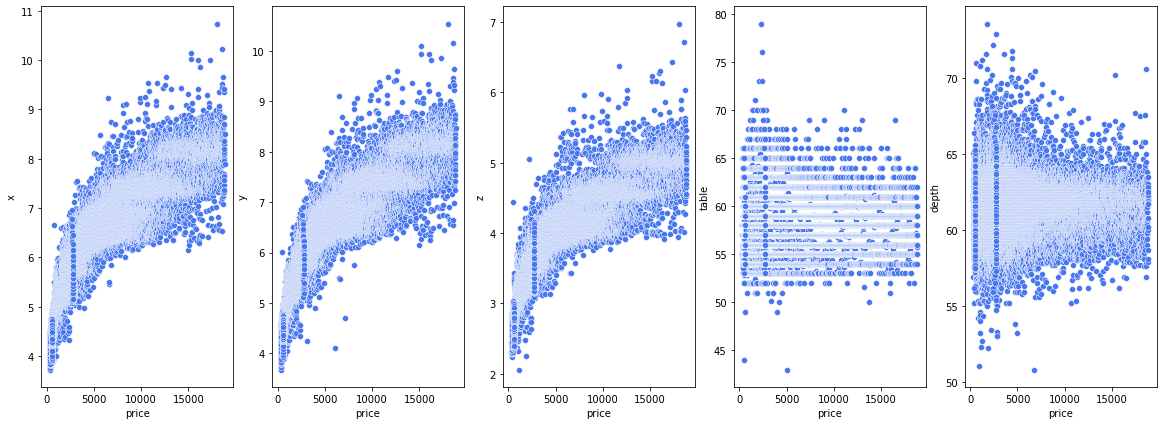

In [11]:
sns.set_palette('turbo')
cols = ['x', 'y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = df, x = df['price'], y = df[i], ax = axs[c])
    c += 1

## Visualizando os dados categóricos

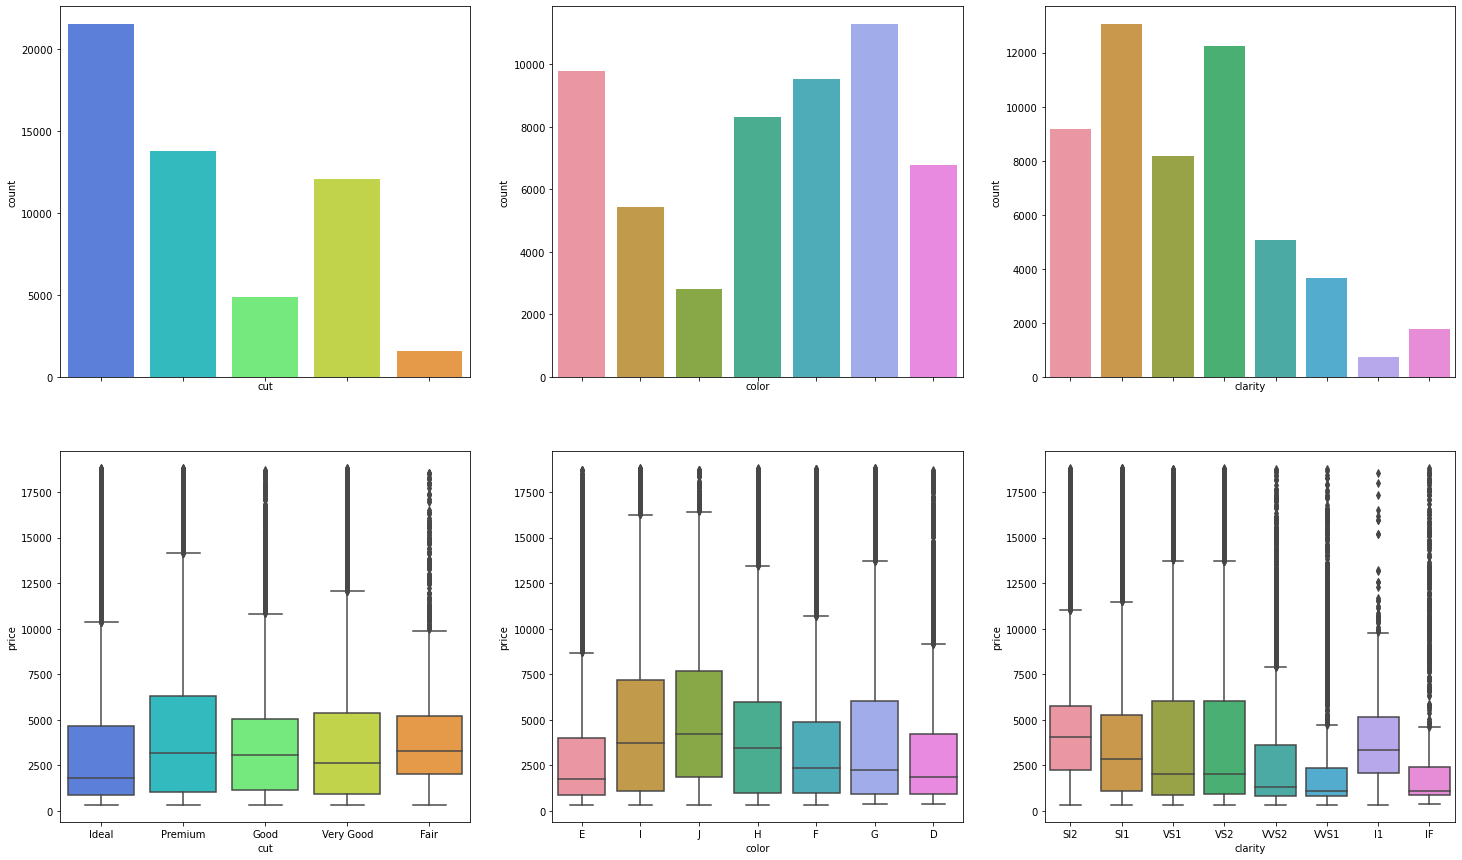

In [12]:
category = ['cut', 'color', 'clarity']
c = 0

fig, axs = plt.subplots(ncols = len(category), nrows = 2, sharex='col', figsize=(25,15))

for i in category:
    sns.countplot(data = df, x = df[i], ax = axs[0,c])
    sns.boxplot(data = df, x = df[i], y = df['price'], ax = axs[1,c])
    c += 1

## Convertendo os dados categóricos para numéricos

In [13]:
df_convertido = df.copy()

In [14]:
category = ['cut', 'color', 'clarity']
c = 0

for i in category:
    df_convertido[i + '_numeric'] = pd.factorize(df_convertido[i])[0]
    df_convertido.drop(i, axis = 1, inplace = True)
    
df_convertido.head()

,carat,depth,table,price,x,y,z,cut_numeric,color_numeric,clarity_numeric
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,1
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,0,2
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,1,3
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,2,0


In [15]:
df_convertido = df_convertido.rename(columns = {'cut_numeric': 'cut', 'color_numeric': 'color', 'clarity_numeric': 'clarity'})
df_convertido.head()

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,1
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,0,2
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,1,3
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,2,0


In [16]:
df_convertido.corr()

,carat,depth,table,price,x,y,z,cut,color,clarity
carat,1.000000,0.029267,0.181797,0.921590,0.977777,0.976860,0.977037,0.114561,-0.065627,-0.281252
depth,0.029267,1.000000,-0.302218,-0.010287,-0.024401,-0.027543,0.097525,0.170914,-0.000314,-0.026757
table,0.181797,-0.302218,1.000000,0.127108,0.196327,0.190153,0.155670,0.382303,-0.034132,-0.134037
price,0.921590,-0.010287,0.127108,1.000000,0.887212,0.888807,0.882634,0.049563,-0.016733,-0.140147
x,0.977777,-0.024401,0.196327,0.887212,1.000000,0.998657,0.991665,0.105911,-0.055139,-0.306834
y,0.976860,-0.027543,0.190153,0.888807,0.998657,1.000000,0.991327,0.109280,-0.055317,-0.304261
z,0.977037,0.097525,0.155670,0.882634,0.991665,0.991327,1.000000,0.128134,-0.054786,-0.306563
cut,0.114561,0.170914,0.382303,0.049563,0.105911,0.109280,0.128134,1.000000,-0.029074,-0.118869
color,-0.065627,-0.000314,-0.034132,-0.016733,-0.055139,-0.055317,-0.054786,-0.029074,1.000000,0.032655
clarity,-0.281252,-0.026757,-0.134037,-0.140147,-0.306834,-0.304261,-0.306563,-0.118869,0.032655,1.000000


<AxesSubplot:>

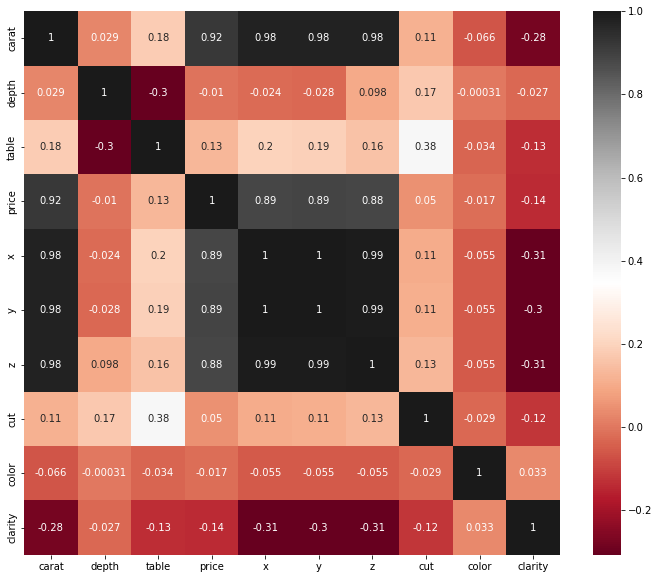

In [17]:
figure, ax = plt.subplots(figsize=(12,10))

sns.heatmap(df_convertido.corr(), annot = True, cmap="RdGy")

### É observado uma alta correlação entre os eixos X, Y, Z e carat (quilate) do diamante com o preço. As outras características apresentam baixa correlação.

## Construção do Modelo

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [19]:
#Dividindo o DataSet em test e train. O price é o alvo e as outras colunas são os atributos.

X = df_convertido.drop('price', axis = 1)
y = df_convertido['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37734, 9) (16173, 9) (37734,) (16173,)


In [20]:
#Linear Regression
lr_pipeline = Pipeline([
    ('scaler_1', StandardScaler()),
    ('lr_classifier', LinearRegression())
])

#KNN
knn_pipeline = Pipeline([
    ('scaler_2', StandardScaler()),
    ('knn_classifier', KNeighborsRegressor())
])

#XGB
xgb_pipeline = Pipeline([
    ('scaler_3', StandardScaler()),
    ('xgb_classifier', XGBRegressor())
])

#Decision Tree
dt_pipeline = Pipeline([
    ('scaler_4', StandardScaler()),
    ('dt_classifier', DecisionTreeRegressor())
])

#Random Forest
rf_pipeline = Pipeline([
    ('scaler_5', StandardScaler()),
    ('rf_classifier', RandomForestRegressor())
])

pipelines = [lr_pipeline, knn_pipeline, xgb_pipeline, dt_pipeline, rf_pipeline]
models = ['Linear Regression', 'KNN', 'XGB', 'Decision Tree', 'Random Forest']

In [21]:
for i in pipelines:
    i.fit(X_train, y_train)

### Cross validation
Usando o negative root mean squared error: Quanto maior o valor, melhor o modelo.

In [22]:
cv_results = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring = "neg_root_mean_squared_error", cv = 10)
    cv_results.append(cv_score)
    print("%s: %f " % (models[i], cv_score.mean()))

Linear Regression: -1418.042536 
KNN: -869.365080 
XGB: -556.652427 
Decision Tree: -780.630381 
Random Forest: -567.148301 


### Para os valores acima, o que apresenta o maior valor foi o XGB, portanto será o modelo usado para realizar a predição.

In [23]:
pred = xgb_pipeline.predict(X_test)

In [24]:
print('R²:', metrics.r2_score(y_test, pred))
print('R² ajustado:', 1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R²: 0.9801644223662208
R² ajustado: 0.9801533773746534


### De acordo com os valores de R² e R² ajustado, foi definido um valor de 98% de acurácia para o modelo proposto.